In [2]:
import numpy as np
from scipy.stats import norm
import numpy as np
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from scipy import stats
import pandas as pd

# Question 1

## Simulating Stock Price

#### SX5E

In [3]:
npr.seed(123)
S0_SX5E = 4235
sigma = 0.15 # vola
r = 0.03 # rfr
q = 0.02 # div
n_scenarios = 10000
time_yrs = 5 # maturity in years
time_steps = 60 # monthly 
delta = time_yrs / time_steps
S_SX5E = np.zeros((n_scenarios, time_steps+1))
S_SX5E[:,0] = S0_SX5E
Z_SX5E = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios ):
    for t in range(1, time_steps+1):
        Z_SX5E[s,t-1] = npr.standard_normal()
        S_SX5E[s,t] = S_SX5E[s,t-1] * np.exp((r-q-0.5 * sigma ** 2) * delta + sigma * np.sqrt(delta) * Z_SX5E[s,t-1])

#### AEX

In [4]:
npr.seed(456)
S0_AEX = 770
sigma = 0.15 # vola
r = 0.03 # rfr
q = 0.02 # div
rho = 0.8
n_scenarios = 10000
time_yrs = 5 # maturity in years
time_steps = 60 # monthly 
delta = time_yrs / time_steps
S_AEX = np.zeros((n_scenarios, time_steps + 1))
S_AEX[:,0] = S0_AEX
Z_AEX = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios):
    for t in range(1, time_steps+1):
        Z_AEX[s,t-1] = npr.standard_normal()
        S_AEX[s,t] = S_AEX[s,t-1] * np.exp((r-q-0.5 * sigma ** 2) * delta + 
                                           sigma * np.sqrt(delta) * (rho*Z_SX5E[s,t-1]+np.sqrt(1-rho ** 2)*Z_AEX[s,t-1]))

## Verifying

### 1b

#### SX5E

In [5]:
# Simulation
X_SX5E_put = 3388 # strike price
n_contracts_SX5E = 10000
final_prices_SX5E = S_SX5E[:, time_steps]
put_value_SX5E= np.array((X_SX5E_put - final_prices_SX5E)*n_contracts_SX5E)
put_value_SX5E[put_value_SX5E < 0] = 0
pv_put_SX5E = put_value_SX5E * np.exp(-r * time_yrs)
np.mean(pv_put_SX5E)

1328913.7846860227

In [6]:
# Black-Scholes
_norm_cdf = stats.norm(0, 1).cdf
_norm_pdf = stats.norm(0, 1).pdf

def d1(S, K, T, r, sigma, q):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma, q) - sigma * np.sqrt(T)

def put_value(S, K, T, r, sigma, q):
    return np.exp(-r * T) * K * _norm_cdf(-d2(S, K, T, r, sigma)) - np.exp(-q * T) * S  * _norm_cdf(
        -d1(S, K, T, r, sigma, q))

In [7]:
put_value_SX5E = put_value(S0_SX5E, X_SX5E_put, time_yrs, r, sigma, q) * n_contracts_SX5E
put_value_SX5E

1303097.5313947261

In [8]:
print("Black-Scholes result:", put_value_SX5E )
print("Simulated result:", np.mean(pv_put_SX5E))

Black-Scholes result: 1303097.5313947261
Simulated result: 1328913.7846860227


In [9]:
# Confidence interval
z_score = 1.96
mean_put_SX5E = np.mean(pv_put_SX5E, axis=0)
std_err_put_SX5E = np.std(pv_put_SX5E, axis=0) / np.sqrt(n_scenarios)
lower_bound_put_SX5E = mean_put_SX5E  - z_score * std_err_put_SX5E
upper_bound_put_SX5E = mean_put_SX5E  + z_score * std_err_put_SX5E
[lower_bound_put_SX5E, upper_bound_put_SX5E]

[1271773.5546726475, 1386054.0146993978]

#### AEX

In [10]:
# Simulation
X_AEX_put = 616 # strike price
n_contracts_AEX = 55000
final_prices_AEX = S_AEX[:, time_steps]
put_value_AEX = np.array((X_AEX_put - final_prices_AEX)*n_contracts_AEX)
put_value_AEX[put_value_AEX < 0] = 0
pv_put_AEX = put_value_AEX * np.exp(-r * time_yrs)
np.mean(pv_put_AEX)

1322582.891374328

In [11]:
put_value_AEX = put_value(S0_AEX, X_AEX_put, time_yrs, r, sigma, q) * n_contracts_AEX
put_value_AEX

1303097.531394727

In [12]:
# Confidence interval
z_score = 1.96
mean_put_AEX = np.mean(pv_put_AEX, axis=0)
std_err_put_AEX = np.std(pv_put_AEX, axis=0) / np.sqrt(n_scenarios)
lower_bound_put_AEX = mean_put_AEX  - z_score * std_err_put_AEX
upper_bound_put_AEX = mean_put_AEX  + z_score * std_err_put_AEX

In [13]:
[lower_bound_put_AEX, upper_bound_put_AEX]

[1265682.6663160417, 1379483.1164326142]

### 1a

#### SX5E

In [14]:
X_SX5E_fwd = 4235
X_AEX_fwd = 770

In [15]:
# Simulation
fwd_sim_SX5E = n_contracts_SX5E * np.exp(-r*time_yrs) * (final_prices_SX5E - X_SX5E_fwd)
np.mean(fwd_sim_SX5E)

2024825.2863349358

In [16]:
# Theoretical value
F_SX5E = S0_SX5E * np.exp((r - q) * time_yrs)
fwd_theo_SX5E = n_contracts_SX5E * np.exp(-r*time_yrs) * (F_SX5E - X_SX5E_fwd)
fwd_theo_SX5E

1868881.852221689

In [17]:
print("Theoretical result:", fwd_theo_SX5E)
print("Simulated result:", np.mean(fwd_sim_SX5E))

Theoretical result: 1868881.852221689
Simulated result: 2024825.2863349358


In [18]:
# Confidence interval
z_score = 1.96
mean_fwd_SX5E = np.mean(fwd_sim_SX5E, axis=0)
std_err_fwd_SX5E = np.std(fwd_sim_SX5E, axis=0) / np.sqrt(n_scenarios)
lower_bound_fwd_SX5E = mean_fwd_SX5E - z_score * std_err_fwd_SX5E
upper_bound_fwd_SX5E = mean_fwd_SX5E + z_score * std_err_fwd_SX5E
[lower_bound_fwd_SX5E, upper_bound_fwd_SX5E]

[1759068.673014127, 2290581.8996557444]

#### AEX

In [19]:
# Simulation
fwd_sim_AEX = n_contracts_AEX * np.exp(-r*time_yrs) * (final_prices_AEX - X_AEX_fwd)
np.mean(fwd_sim_AEX)

1920160.6302630776

In [20]:
# Theoretical value
F_AEX = S0_AEX * np.exp((r - q) * time_yrs)
fwd_theo_AEX = n_contracts_AEX * np.exp(-r*time_yrs) * (F_AEX - X_AEX_fwd)
fwd_theo_AEX

1868881.8522216943

In [21]:
z_score = 1.96
mean_fwd_AEX = np.mean(fwd_sim_AEX, axis=0)  # Replace fwd_sim_SX5E with fwd_sim_AEX
std_err_fwd_AEX = np.std(fwd_sim_AEX, axis=0) / np.sqrt(n_scenarios)  # Replace fwd_sim_SX5E with fwd_sim_AEX
lower_bound_fwd_AEX = mean_fwd_AEX - z_score * std_err_fwd_AEX
upper_bound_fwd_AEX = mean_fwd_AEX + z_score * std_err_fwd_AEX
[lower_bound_fwd_AEX, upper_bound_fwd_AEX]

[1659041.3034682286, 2181279.957057927]

### 1c

In [22]:
SX5E = pd.DataFrame(S_SX5E)
ret_SX5E = np.log(SX5E.iloc[:, 1:] / (SX5E.iloc[:, :-1].values))
AEX = pd.DataFrame(S_AEX)
ret_AEX = np.log(AEX.iloc[:, 1:] / (AEX.iloc[:, :-1].values))
corr = np.corrcoef(ret_SX5E.iloc[0,:], ret_AEX.iloc[0,:])

In [23]:
corr

array([[1.        , 0.87954576],
       [0.87954576, 1.        ]])

In [24]:
correlations = []
for idx in range(len(ret_SX5E)):
    corr = np.corrcoef(ret_SX5E.iloc[idx,:], ret_AEX.iloc[idx,:])[0, 1]
    correlations.append(corr)

In [25]:
np.mean(correlations)

0.7972732569407491

In [26]:
correlations

[0.8795457592882576,
 0.8217713193292546,
 0.7197575103000907,
 0.7701092568988621,
 0.8841168051412798,
 0.72894240260201,
 0.7854035885538253,
 0.7690294321941838,
 0.7995076899638233,
 0.837612879876117,
 0.7500279762785341,
 0.8521420748110468,
 0.8640549361073483,
 0.7754244479322828,
 0.833828216347169,
 0.8179943585269283,
 0.8037061378947155,
 0.7783628027198666,
 0.7165821294460262,
 0.8417431900737651,
 0.7018204336452438,
 0.859631071822107,
 0.7006420845887835,
 0.7281166037024983,
 0.8287809081651945,
 0.7861618450489585,
 0.8346496849874351,
 0.8827070019134869,
 0.8517666015762808,
 0.7735247774419923,
 0.8089651155485668,
 0.8034460831628751,
 0.8659365605617043,
 0.828846029008235,
 0.773298528839465,
 0.827905950522532,
 0.7925107963371975,
 0.840533115220443,
 0.7237832347499081,
 0.728004218412408,
 0.8025876447442364,
 0.7209052544827903,
 0.8615545201551159,
 0.8007629504178982,
 0.7967438792457789,
 0.7869049601200494,
 0.7955126716723732,
 0.7454336240102077,
 0

In [26]:
# Function to calculate confidence interval of correlation
def correlation_ci(correlation_values, alpha=0.05):
    
    # Fisher's z transformation
    z_transformed = np.arctanh(correlation_values)

    # Compute standard error
    n = len(correlation_values)
    SE = 1 / np.sqrt(n - 2)  # For Pearson's r, degrees of freedom is n - 2

    # Compute critical value for desired confidence level
    z_crit = norm.ppf(1 - alpha / 2)

    # Compute confidence interval
    lower_bound = np.tanh(np.mean(z_transformed) - z_crit * SE)
    upper_bound = np.tanh(np.mean(z_transformed) + z_crit * SE)

    return lower_bound, upper_bound

In [27]:
correlation_ci(correlations, alpha=0.05)

(0.7951294939265656, 0.8091044388378041)

# Question 2

## 2a 

In [28]:
X_SX5E_fwd = 4235
X_AEX_fwd = 770

In [29]:
times = np.linspace(0, 5, int((5 - 0) * 12) + 1)
AEX.columns = times
SX5E.columns = times

In [30]:
eqf_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)
eqf_AEX = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)

In [31]:
# Calculate exposure for EQ forward contract

for i in range(eqf_SX5E.shape[0]):
    for j in range(eqf_SX5E.shape[1]):
        eqf_SX5E.iloc[i,j] = n_contracts_SX5E*np.exp(-r*(5-eqf_SX5E.columns[j]))*\
        (SX5E.iloc[i,j]*np.exp((r-q)*(5-eqf_SX5E.columns[j]))-X_SX5E_fwd)
        
for i in range(eqf_AEX.shape[0]):
    for j in range(eqf_AEX.shape[1]):
        eqf_AEX.iloc[i,j] = n_contracts_AEX*np.exp(-r*(5-eqf_AEX.columns[j]))*\
        (AEX.iloc[i,j]*np.exp((r-q)*(5-eqf_AEX.columns[j]))-X_AEX_fwd)

In [32]:
# Calculate exposure for put option contract - Black Scholes

p_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)
p_AEX = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)

for i in range(p_SX5E.shape[0]):
    for j in range(p_SX5E.shape[1]-1):
        tte = 5 - p_SX5E.columns[j]
        p_SX5E.iloc[i,j] = put_value(SX5E.iloc[i,j], X_SX5E_put, tte, r, sigma, q) * n_contracts_SX5E
    p_SX5E.iloc[i,60] = n_contracts_SX5E * max(X_SX5E_put - SX5E.iloc[i,60],0)
    

for i in range(p_AEX.shape[0]):
    for j in range(p_AEX.shape[1]-1):
        tte = 5 - p_AEX.columns[j]
        p_AEX.iloc[i,j] = put_value(AEX.iloc[i,j], X_AEX_put, tte, r, sigma, q) * n_contracts_AEX
    p_AEX.iloc[i,60] = n_contracts_AEX * max(X_AEX_put - AEX.iloc[i,60],0)

In [33]:
# Netting all of the contracts
netting = eqf_SX5E + eqf_AEX + p_SX5E + p_AEX
positive_netting = np.maximum(netting, 0)

In [34]:
positive_netting

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,4.250000,4.333333,4.416667,4.500000,4.583333,4.666667,4.750000,4.833333,4.916667,5.000000
0,6343958.767233,3126203.092189,4984366.324214,6083698.984703,2817569.444512,2456901.004412,7832860.793885,2082363.199908,1405694.892987,3884414.556696,...,4297370.443359,973015.910777,5062340.891758,1277961.151007,2732201.870862,6185715.938953,8473783.044318,14956875.084015,18910306.0579,25756320.639881
1,6343958.767233,3980631.643926,6005908.509108,6478382.251789,3100263.641543,5621705.495492,7349196.11221,7945350.612842,6684376.826764,3441214.362452,...,0,192095.833068,563651.64369,2280667.165188,6550748.063675,5817074.72004,3270907.644546,5534301.750025,13240488.966998,4785201.26029
2,6343958.767233,5448541.148948,3262916.202185,2779823.684898,3921314.179345,8913796.910694,7618324.605929,10001126.175162,10763967.808168,11891151.604715,...,7384180.17777,6556368.467485,5088100.021376,4438239.801117,3578741.610246,8136268.685792,9169009.651125,7306744.890388,5276741.083133,6506621.800555
3,6343958.767233,6210491.003022,10510217.589022,14584853.128525,11664455.090472,8409521.04365,731590.654142,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6343958.767233,7389158.569163,8584048.150177,8261588.957666,6948246.157633,8315069.120513,6238690.097441,7704069.563606,840412.870044,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6343958.767233,6200551.216826,2499706.97942,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,6343958.767233,6787097.849256,5933557.303214,3895735.224534,6601262.774087,4845001.372247,7743004.392901,6565602.970828,6711777.597077,5645908.809789,...,2919085.85132,600630.992781,0,0,0,0,0,0,0,0
9997,6343958.767233,3507871.202909,3713097.825137,5322408.184147,8702516.826494,10966740.5519,5041003.961383,8429308.357989,8495553.968454,6551730.899163,...,0,0,0,0,0,0,0,0,0,0
9998,6343958.767233,6732538.080781,9204854.214969,9447453.488325,9640278.473176,14471042.052505,8767592.531664,11635213.993322,9251437.07953,14598228.464318,...,41059351.513101,40491356.855395,38414203.092929,37915470.167977,41420134.893399,49849442.952035,54017228.444331,55998625.836028,51620316.980814,57956632.155703


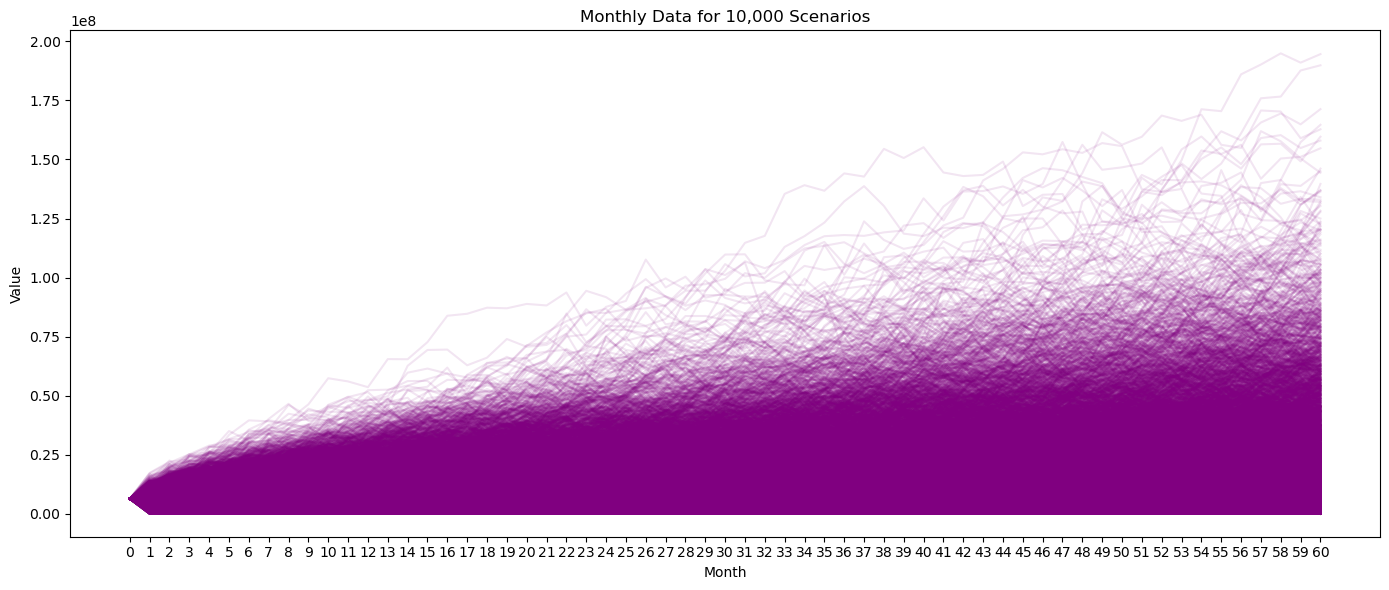

In [42]:
months = np.linspace(0, 60, 61)
plt.figure(figsize=(14, 6))
for i in range(positive_netting.shape[0]):
    plt.plot(months, positive_netting.iloc[i, :], color='purple', alpha=0.1)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Data for 10,000 Scenarios')
plt.xticks(months)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

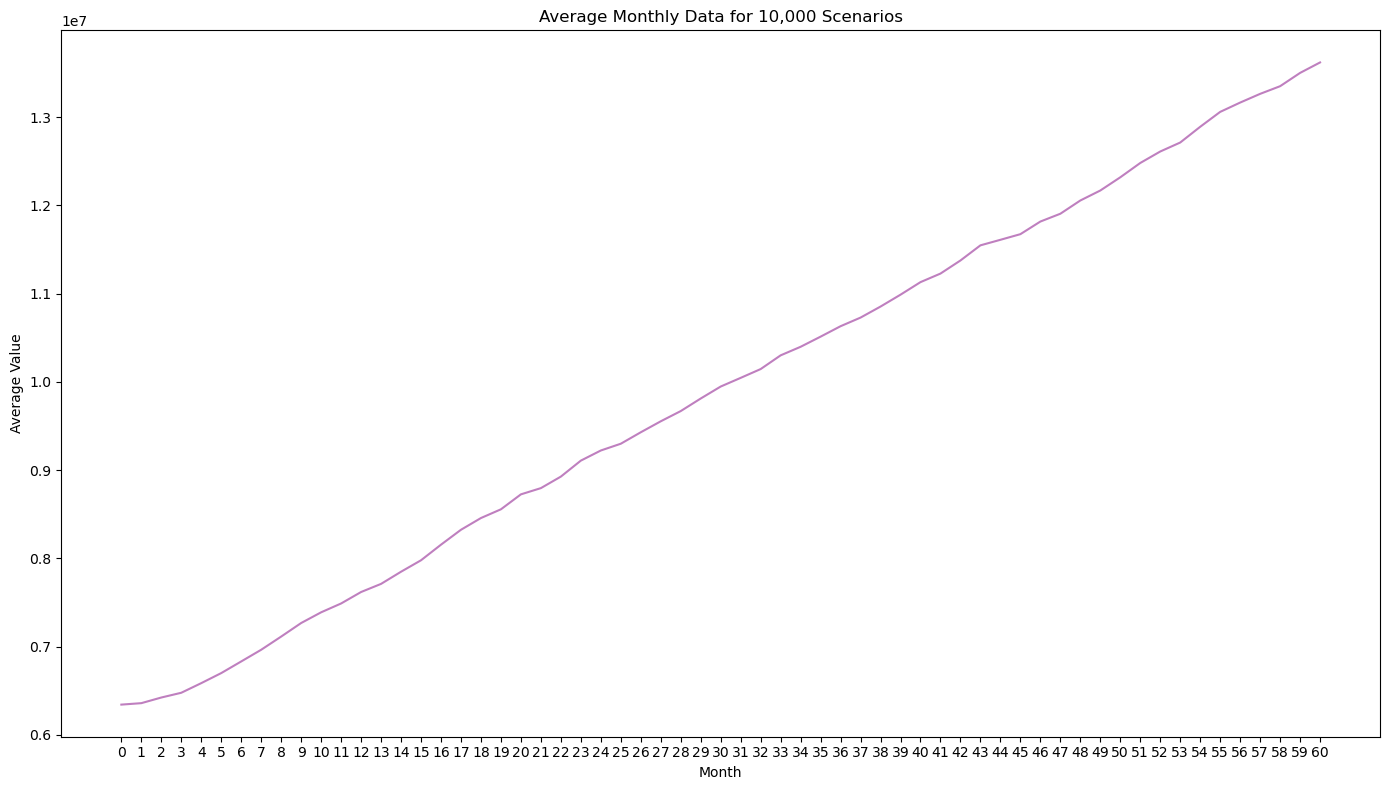

In [60]:
avg_positive_netting = positive_netting.mean()
months = np.linspace(0, 60, 61)

plt.figure(figsize=(14, 8))
plt.plot(months, avg_positive_netting, color='purple', alpha=0.5)  # Adjust alpha for transparency

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Average Monthly Data for 10,000 Scenarios')

plt.xticks(months)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Q2a.png')
plt.show()

## 2b

#### Forward SX5E

In [481]:
index = ['T', 'Forward intensity', 'Cumulative intensity', 'Q', 'Average Discounted Loss Fwd SX5E']
cva = pd.DataFrame(index = index, columns=SX5E.columns)

In [482]:
# Forward hazard rates
for col_value in cva.columns.values:
    if col_value < 1:
        cva[col_value] = 0.02
    elif col_value >= 1 and col_value < 3:
        cva[col_value] = 0.0215
    else:
        cva[col_value] = 0.022

In [483]:
# T
cva.loc['T'] = SX5E.columns.values
cva.iloc[2,0] = 0
cva.iloc[3,0] = 0

In [484]:
# Cumulative intensity
for i in range(1, cva.shape[1]):
    cva.iloc[2,i] = cva.iloc[2,i-1]+cva.iloc[1,i-1]*\
    (cva.iloc[0,i]-cva.iloc[0,i-1])
    

In [485]:
# Q(t_{i-1},t_i)
for i in range(1, cva.shape[1]):
     cva.iloc[3,i] = np.exp(-cva.iloc[2,i-1])-np.exp(-cva.iloc[2,i]) 
    

In [486]:
loss_fwd_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)

In [487]:
# Simulated Losses (conditional on default)
LGD = 0.4
for i in range(loss_fwd_SX5E.shape[0]):
    for j in range(loss_fwd_SX5E.shape[1]):
        loss_fwd_SX5E.iloc[i,j] = np.exp(-r*loss_fwd_SX5E.columns[j])*LGD*max(eqf_SX5E.iloc[i,j],0)

In [488]:
# Average Discounted Loss (conditional on default)
cva.loc['Average Discounted Loss Fwd SX5E'] = loss_fwd_SX5E.mean()

In [489]:
cva.loc['CVA Fwd SX5E per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[5,i] = cva.iloc[3,i] * cva.iloc[4,i]

In [490]:
cva_fwd_SX5E_sum = np.sum(cva.loc['CVA Fwd SX5E per period'])

In [491]:
cva_fwd_SX5E_sum

182758.93365607032

#### Forward AEX

In [492]:
# Simulated loss
loss_fwd_AEX = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_fwd_AEX.shape[0]):
    for j in range(loss_fwd_AEX.shape[1]):
        loss_fwd_AEX.iloc[i, j] = np.exp(-r * loss_fwd_AEX.columns[j]) * LGD * max(eqf_AEX.iloc[i, j], 0)
        
# Average loss
cva.loc['Average Discounted Loss Fwd AEX'] = loss_fwd_AEX.mean()

# CVA per period
cva.loc['CVA Fwd AEX per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[7, i] = cva.iloc[3, i] * cva.iloc[6, i]
    
# Total CVA
cva_fwd_AEX_sum = np.sum(cva.loc['CVA Fwd AEX per period'])
cva_fwd_AEX_sum

178914.05016982282

#### Put SX5E

In [493]:
# Simulated loss
loss_put_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)
for i in range(loss_put_SX5E.shape[0]):
    for j in range(loss_put_SX5E.shape[1]):
        loss_put_SX5E.iloc[i, j] = np.exp(-r * loss_put_SX5E.columns[j]) * LGD * p_SX5E.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Put SX5E'] = loss_put_SX5E.mean()

# CVA per period
cva.loc['CVA Put SX5E per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[9, i] = cva.iloc[3, i] * cva.iloc[8, i]

# Total CVA
cva_put_SX5E_sum = np.sum(cva.loc['CVA Put SX5E per period'])
cva_put_SX5E_sum

52919.44241588256

#### Put AEX

In [494]:
# Simulated loss
loss_put_AEX = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_put_AEX.shape[0]):
    for j in range(loss_put_AEX.shape[1]):
        loss_put_AEX.iloc[i, j] = np.exp(-r * loss_put_AEX.columns[j]) * LGD * p_AEX.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Put AEX'] = loss_put_AEX.mean()
cva.loc['CVA Put AEX per period'] = 0

# CVA per period
for i in range(1, cva.shape[1]):
    cva.iloc[11, i] = cva.iloc[3, i] * cva.iloc[10, i]

# Total CVA
cva_put_AEX_sum = np.sum(cva.loc['CVA Put AEX per period'])
cva_put_AEX_sum


52654.28887861432

### 2d

In [495]:
# Simulated loss
loss_netting = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_netting.shape[0]):
    for j in range(loss_netting.shape[1]):
        loss_netting.iloc[i, j] = np.exp(-r * loss_netting.columns[j]) * LGD * positive_netting.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Netting'] = loss_netting.mean()

# CVA per period
cva.loc['CVA Netting per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[13, i] = cva.iloc[3, i] * cva.iloc[12, i]

# Total CVA
cva_netting_sum = np.sum(cva.loc['CVA Netting per period'])
cva_netting_sum

370900.9368758239

### 2c

In [496]:
positive_not_netting = np.maximum(eqf_SX5E, 0) + np.maximum(eqf_AEX, 0) + p_SX5E + p_AEX

In [497]:
# Simulated loss
loss_not_netting = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_not_netting.shape[0]):
    for j in range(loss_not_netting.shape[1]):
        loss_not_netting.iloc[i, j] = np.exp(-r * loss_not_netting.columns[j]) * LGD * positive_not_netting.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Not Netting'] = loss_not_netting.mean()

# CVA per period
cva.loc['CVA Not Netting per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[15, i] = cva.iloc[3, i] * cva.iloc[14, i]

# Total CVA
cva_not_netting_sum = np.sum(cva.loc['CVA Not Netting per period'])
cva_not_netting_sum

467246.71512038994

In [498]:
cva

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,4.250000,4.333333,4.416667,4.500000,4.583333,4.666667,4.750000,4.833333,4.916667,5.000000
T,0.000000e+00,8.333333e-02,1.666667e-01,2.500000e-01,3.333333e-01,4.166667e-01,5.000000e-01,5.833333e-01,6.666667e-01,7.500000e-01,...,4.250000e+00,4.333333e+00,4.416667e+00,4.500000e+00,4.583333e+00,4.666667e+00,4.750000e+00,4.833333e+00,4.916667e+00,5.000000e+00
Forward intensity,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,...,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02
Cumulative intensity,0.000000e+00,1.666667e-03,3.333333e-03,5.000000e-03,6.666667e-03,8.333333e-03,1.000000e-02,1.166667e-02,1.333333e-02,1.500000e-02,...,9.050000e-02,9.233333e-02,9.416667e-02,9.600000e-02,9.783333e-02,9.966667e-02,1.015000e-01,1.033333e-01,1.051667e-01,1.070000e-01
Q,0.000000e+00,1.665279e-03,1.662505e-03,1.659737e-03,1.656973e-03,1.654214e-03,1.651459e-03,1.648709e-03,1.645963e-03,1.643222e-03,...,1.676239e-03,1.673169e-03,1.670104e-03,1.667045e-03,1.663992e-03,1.660944e-03,1.657901e-03,1.654865e-03,1.651834e-03,1.648808e-03
Average Discounted Loss Fwd SX5E,7.475527e+05,7.892563e+05,8.590374e+05,9.174730e+05,9.795858e+05,1.032491e+06,1.081797e+06,1.125464e+06,1.170479e+06,1.215745e+06,...,2.304759e+06,2.321097e+06,2.336283e+06,2.361952e+06,2.386971e+06,2.403407e+06,2.413891e+06,2.426003e+06,2.446912e+06,2.466165e+06
CVA Fwd SX5E per period,0.000000e+00,1.314332e+03,1.428154e+03,1.522764e+03,1.623147e+03,1.707960e+03,1.786544e+03,1.855562e+03,1.926565e+03,1.997740e+03,...,3.863328e+03,3.883587e+03,3.901835e+03,3.937480e+03,3.971900e+03,3.991924e+03,4.001993e+03,4.014708e+03,4.041892e+03,4.066232e+03
Average Discounted Loss Fwd AEX,7.475527e+05,7.838549e+05,8.529306e+05,9.116230e+05,9.650153e+05,1.014851e+06,1.063705e+06,1.109902e+06,1.157672e+06,1.201150e+06,...,2.253904e+06,2.278494e+06,2.288623e+06,2.316667e+06,2.339167e+06,2.351779e+06,2.367180e+06,2.379317e+06,2.402849e+06,2.415353e+06
CVA Fwd AEX per period,0.000000e+00,1.305337e+03,1.418002e+03,1.513054e+03,1.599004e+03,1.678780e+03,1.756666e+03,1.829905e+03,1.905485e+03,1.973756e+03,...,3.778082e+03,3.812305e+03,3.822239e+03,3.861988e+03,3.892354e+03,3.906173e+03,3.924552e+03,3.937448e+03,3.969106e+03,3.982454e+03
Average Discounted Loss Put SX5E,5.212390e+05,5.208801e+05,5.205761e+05,5.219922e+05,5.212900e+05,5.225269e+05,5.216114e+05,5.201405e+05,5.188201e+05,5.170884e+05,...,5.290322e+05,5.313614e+05,5.298653e+05,5.267946e+05,5.263051e+05,5.264369e+05,5.259448e+05,5.276238e+05,5.287669e+05,5.315655e+05
CVA Put SX5E per period,0.000000e+00,8.674105e+02,8.654605e+02,8.663697e+02,8.637634e+02,8.643711e+02,8.614197e+02,8.575601e+02,8.539588e+02,8.496912e+02,...,8.867844e+02,8.890572e+02,8.849301e+02,8.781902e+02,8.757672e+02,8.743821e+02,8.719647e+02,8.731460e+02,8.734350e+02,8.764495e+02


In [499]:
np.sum(cva.iloc[5,:])

182758.93365607032

In [500]:
cvasum = pd.DataFrame(columns=['CVA Charge'])
cvasum.loc['fwd SX5E'] = cva_fwd_SX5E_sum
cvasum.loc['fwd AEX'] = cva_fwd_AEX_sum
cvasum.loc['put SX5E'] = cva_put_SX5E_sum
cvasum.loc['put AEX'] = cva_put_AEX_sum
cvasum.loc['netting'] = cva_netting_sum
cvasum.loc['not netting'] = cva_not_netting_sum

In [501]:
# Summarize CVA charge of all instruments
cvasum

,CVA Charge
fwd SX5E,182758.933656
fwd AEX,178914.050170
put SX5E,52919.442416
put AEX,52654.288879
netting,370900.936876
not netting,467246.715120


# Question 3

## 3a

In [502]:
# Simulate stock price
npr.seed(789)
S0_SX5E = 4235
sigma_new = 0.3 # vola
r = 0.03 # rfr
q = 0.02 # div
n_scenarios = 10000
time_yrs = 5 # maturity in years
time_steps = 60 # monthly 
delta = time_yrs / time_steps
S_SX5E_new = np.zeros((n_scenarios, time_steps+1))
S_SX5E_new[:,0] = S0_SX5E
Z_SX5E_new = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios):
    for t in range(1, time_steps+1):
        Z_SX5E_new[s,t-1] = npr.standard_normal()
        S_SX5E_new[s,t] = S_SX5E_new[s,t-1] * np.exp((r-q-0.5 * sigma_new ** 2) * delta + sigma_new * np.sqrt(delta) * Z_SX5E_new[s,t-1])

npr.seed(1011)
S0_AEX = 770
n_scenarios = 10000
time_yrs = 5 # maturity in years
time_steps = 60 # monthly 
delta = time_yrs / time_steps
S_AEX_new = np.zeros((n_scenarios, time_steps + 1))
S_AEX_new[:,0] = S0_AEX
Z_AEX_new = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios):
    for t in range(1, time_steps+1):
        Z_AEX_new[s,t-1] = npr.standard_normal()
        S_AEX_new[s,t] = S_AEX_new[s,t-1] * np.exp((r-q-0.5 * sigma_new ** 2) * delta + 
                                           sigma_new * np.sqrt(delta) * (rho*Z_SX5E_new[s,t-1]+np.sqrt(1-rho ** 2)*Z_AEX_new[s,t-1]))


In [503]:
AEX_new = pd.DataFrame(S_AEX_new)
SX5E_new = pd.DataFrame(S_SX5E_new)

In [504]:
AEX_new.columns = times
SX5E_new.columns = times

In [505]:
eqf_SX5E_new = pd.DataFrame(index=SX5E_new.index, columns=SX5E_new.columns)
eqf_AEX_new = pd.DataFrame(index=SX5E_new.index, columns=SX5E_new.columns)

In [506]:
# Calculate exposure for EQ forward contract

for i in range(eqf_SX5E_new.shape[0]):
    for j in range(eqf_SX5E_new.shape[1]):
        eqf_SX5E_new.iloc[i,j] = n_contracts_SX5E*np.exp(-r*(5-eqf_SX5E_new.columns[j]))*\
        (SX5E_new.iloc[i,j]*np.exp((r-q)*(5-eqf_SX5E_new.columns[j]))-X_SX5E_fwd)
        
for i in range(eqf_AEX_new.shape[0]):
    for j in range(eqf_AEX_new.shape[1]):
        eqf_AEX_new.iloc[i,j] = n_contracts_AEX*np.exp(-r*(5-eqf_AEX_new.columns[j]))*\
        (AEX_new.iloc[i,j]*np.exp((r-q)*(5-eqf_AEX_new.columns[j]))-X_AEX_fwd)

In [507]:
# Calculate exposure for put option contract - Black Scholes
p_SX5E_new = pd.DataFrame(index=SX5E_new.index, columns=SX5E_new.columns)
p_AEX_new = pd.DataFrame(index=SX5E_new.index, columns=SX5E_new.columns)
# Change only equity volatility => remain vol of put option
for i in range(p_SX5E_new.shape[0]):
    for j in range(p_SX5E_new.shape[1]-1):
        tte = 5 - p_SX5E_new.columns[j]
        p_SX5E_new.iloc[i,j] = put_value(SX5E_new.iloc[i,j], X_SX5E_put, tte, r, sigma, q) * n_contracts_SX5E
    p_SX5E_new.iloc[i,60] = n_contracts_SX5E * max(X_SX5E_put - SX5E_new.iloc[i,60],0)

for i in range(p_AEX_new.shape[0]):
    for j in range(p_AEX_new.shape[1]-1):
        tte = 5 - p_AEX_new.columns[j]
        p_AEX_new.iloc[i,j] = put_value(AEX_new.iloc[i,j], X_AEX_put, tte, r, sigma, q) * n_contracts_AEX
    p_AEX_new.iloc[i,60] = n_contracts_AEX * max(X_AEX_put - AEX_new.iloc[i,60],0)

In [508]:
# Netting all of the contracts
netting_new = eqf_SX5E_new + eqf_AEX_new + p_SX5E_new + p_AEX_new
positive_netting_new = np.maximum(netting_new, 0)

In [509]:
positive_netting_new

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,4.250000,4.333333,4.416667,4.500000,4.583333,4.666667,4.750000,4.833333,4.916667,5.000000
0,6343958.767233,0,0,0,4594776.395096,4627736.341522,1977810.89822,4355422.824628,2607972.065205,0,...,17846454.436431,30575658.287545,33802261.290219,24167335.482466,21702996.396421,27599762.843112,23700114.149893,28575456.899062,34081317.305936,34617492.309747
1,6343958.767233,6037065.563837,1923831.678894,1268171.479765,4912963.03647,9657416.573871,5326932.266368,7557842.695443,1928187.862677,0,...,0,0,0,0,0,0,0,0,0,0
2,6343958.767233,1857550.40365,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6343958.767233,1331875.285382,0,0,0,0,0,0,0,0,...,2307640.805481,11503497.105456,8113654.787197,17441393.717274,20879411.344549,19446987.255362,29577746.274276,21265926.25575,21711718.37605,17494779.760795
4,6343958.767233,6844925.368795,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6343958.767233,47831.129167,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,6343958.767233,9342467.582652,3775121.3338,4343231.898791,8391249.379643,172575.759558,0,0,1260484.056383,3417635.888561,...,0,0,0,0,0,0,0,0,0,0
9997,6343958.767233,4401815.759011,1633750.731427,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,6343958.767233,3360087.311411,8754059.535999,3857740.873194,4200598.654451,3375952.354298,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [510]:
index1 = ['T', 'Forward intensity', 'Cumulative intensity', 'Q', 'Average Discounted Loss Netting new sigma']
cva_sigma_new = pd.DataFrame(index = index1, columns=SX5E_new.columns)

In [511]:
# Forward hazard rates
for col_value in cva_sigma_new.columns.values:
    if col_value < 1:
        cva_sigma_new[col_value] = 0.02
    elif col_value >= 1 and col_value < 3:
        cva_sigma_new[col_value] = 0.0215
    else:
        cva_sigma_new[col_value] = 0.022

# T
cva_sigma_new.loc['T'] = SX5E.columns.values
cva_sigma_new.iloc[2,0] = 0
cva_sigma_new.iloc[3,0] = 0

# Cumulative intensity
for i in range(1, cva_sigma_new.shape[1]):
    cva_sigma_new.iloc[2,i] = cva_sigma_new.iloc[2,i-1]+cva_sigma_new.iloc[1,i-1]*\
    (cva_sigma_new.iloc[0,i]-cva_sigma_new.iloc[0,i-1])

# Q(t_{i-1},t_i)
for i in range(1, cva_sigma_new.shape[1]):
     cva_sigma_new.iloc[3,i] = np.exp(-cva_sigma_new.iloc[2,i-1])-np.exp(-cva_sigma_new.iloc[2,i]) 

# Simulated loss
loss_netting_new = pd.DataFrame(index=AEX_new.index, columns=AEX_new.columns)
for i in range(loss_netting_new.shape[0]):
    for j in range(loss_netting_new.shape[1]):
        loss_netting_new.iloc[i, j] = np.exp(-r * loss_netting_new.columns[j]) * LGD * positive_netting_new.iloc[i, j]

# Average loss
cva_sigma_new.loc['Average Discounted Loss Netting new sigma'] = loss_netting_new.mean()

# CVA per period
cva_sigma_new.loc['CVA Netting per period'] = 0
for i in range(1, cva_sigma_new.shape[1]):
    cva_sigma_new.iloc[5, i] = cva_sigma_new.iloc[3, i] * cva_sigma_new.iloc[4, i]

# Total CVA
cva_netting_sigma_new = np.sum(cva_sigma_new.loc['CVA Netting per period'])

In [512]:
cva_netting_sigma_new

625796.9346665303

## 3b

In [513]:
# Simulate stock price
npr.seed(1112)
S0_SX5E = 4235
sigma = 0.15 # vola
r = 0.03 # rfr
q = 0.02 # div
n_scenarios = 10000
time_yrs = 5 # maturity in years
time_steps = 60 # monthly 
delta = time_yrs / time_steps
S_SX5E_new1 = np.zeros((n_scenarios, time_steps+1))
S_SX5E_new1[:,0] = S0_SX5E
Z_SX5E_new1 = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios):
    for t in range(1, time_steps+1):
        Z_SX5E_new1[s,t-1] = npr.standard_normal()
        S_SX5E_new1[s,t] = S_SX5E_new1[s,t-1] * np.exp((r-q-0.5 * sigma ** 2) * delta + sigma * np.sqrt(delta) * Z_SX5E_new1[s,t-1])

npr.seed(1314)
S0_AEX = 770
rho_new = 0.4
delta = time_yrs / time_steps
S_AEX_new1 = np.zeros((n_scenarios, time_steps + 1))
S_AEX_new1[:,0] = S0_AEX
Z_AEX_new1 = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios):
    for t in range(1, time_steps+1):
        Z_AEX_new1[s,t-1] = npr.standard_normal()
        S_AEX_new1[s,t] = S_AEX_new1[s,t-1] * np.exp((r-q-0.5 * sigma ** 2) * delta + 
                                           sigma * np.sqrt(delta) * (rho_new*Z_SX5E_new1[s,t-1]+np.sqrt(1-rho_new ** 2)*Z_AEX_new1[s,t-1]))

In [514]:
AEX_new1 = pd.DataFrame(S_AEX_new1)
SX5E_new1 = pd.DataFrame(S_SX5E_new1)

In [515]:
AEX_new1.columns = times
SX5E_new1.columns = times

In [516]:
eqf_SX5E_new1 = pd.DataFrame(index=SX5E_new1.index, columns=SX5E_new1.columns)
eqf_AEX_new1 = pd.DataFrame(index=SX5E_new1.index, columns=SX5E_new1.columns)

# Calculate exposure for EQ forward contract

for i in range(eqf_SX5E_new1.shape[0]):
    for j in range(eqf_SX5E_new1.shape[1]):
        eqf_SX5E_new1.iloc[i,j] = n_contracts_SX5E*np.exp(-r*(5-eqf_SX5E_new1.columns[j]))*\
        (SX5E_new1.iloc[i,j]*np.exp((r-q)*(5-eqf_SX5E_new1.columns[j]))-X_SX5E_fwd)
        
for i in range(eqf_AEX_new1.shape[0]):
    for j in range(eqf_AEX_new1.shape[1]):
        eqf_AEX_new1.iloc[i,j] = n_contracts_AEX*np.exp(-r*(5-eqf_AEX_new1.columns[j]))*\
        (AEX_new1.iloc[i,j]*np.exp((r-q)*(5-eqf_AEX_new1.columns[j]))-X_AEX_fwd)

In [523]:
# Calculate exposure for put option contract - Black Scholes

p_SX5E_new1 = pd.DataFrame(index=SX5E_new1.index, columns=SX5E_new1.columns)
p_AEX_new1 = pd.DataFrame(index=SX5E_new1.index, columns=SX5E_new1.columns)

for i in range(p_SX5E_new1.shape[0]):
    for j in range(p_SX5E_new1.shape[1]-1):
        tte = 5 - p_SX5E_new1.columns[j]
        p_SX5E_new1.iloc[i,j] = put_value(SX5E_new1.iloc[i,j], X_SX5E_put, tte, r, sigma, q) * n_contracts_SX5E
    p_SX5E_new1.iloc[i,60] = n_contracts_SX5E * max(X_SX5E_put - SX5E_new1.iloc[i,60],0)
for i in range(p_AEX_new1.shape[0]):
    for j in range(p_AEX_new1.shape[1]-1):
        tte = 5 - p_AEX_new1.columns[j]
        p_AEX_new1.iloc[i,j] = put_value(AEX_new1.iloc[i,j], X_AEX_put, tte, r, sigma, q) * n_contracts_AEX
    p_AEX_new1.iloc[i,60] = n_contracts_AEX * max(X_AEX_put - AEX_new1.iloc[i,60],0)

In [524]:
# Netting all of the contracts
netting_new1 = eqf_SX5E_new1 + eqf_AEX_new1 + p_SX5E_new1 + p_AEX_new1
positive_netting_new1 = np.maximum(netting_new1, 0)

In [525]:
index2 = ['T', 'Forward intensity', 'Cumulative intensity', 'Q', 'Average Discounted Loss Netting new rho']
cva_rho_new = pd.DataFrame(index = index2, columns=SX5E_new.columns)

In [526]:
# Forward hazard rates
for col_value in cva_rho_new.columns.values:
    if col_value < 1:
        cva_rho_new[col_value] = 0.02
    elif col_value >= 1 and col_value < 3:
        cva_rho_new[col_value] = 0.0215
    else:
        cva_rho_new[col_value] = 0.022

# T
cva_rho_new.loc['T'] = SX5E.columns.values
cva_rho_new.iloc[2,0] = 0
cva_rho_new.iloc[3,0] = 0

# Cumulative intensity
for i in range(1, cva_rho_new.shape[1]):
    cva_rho_new.iloc[2,i] = cva_rho_new.iloc[2,i-1] + cva_rho_new.iloc[1,i-1] * (cva_rho_new.iloc[0,i] - cva_rho_new.iloc[0,i-1])

# Q(t_{i-1},t_i)
for i in range(1, cva_rho_new.shape[1]):
     cva_rho_new.iloc[3,i] = np.exp(-cva_rho_new.iloc[2,i-1]) - np.exp(-cva_rho_new.iloc[2,i]) 

# Simulated loss
loss_netting_new1 = pd.DataFrame(index=AEX_new.index, columns=AEX_new.columns)
for i in range(loss_netting_new1.shape[0]):
    for j in range(loss_netting_new1.shape[1]):
        loss_netting_new1.iloc[i, j] = np.exp(-r * loss_netting_new1.columns[j]) * LGD * positive_netting_new1.iloc[i, j]

# Average loss
cva_rho_new.loc['Average Discounted Loss Netting new rho'] = loss_netting_new.mean()

# CVA per period
cva_rho_new.loc['CVA Netting per period'] = 0
for i in range(1, cva_rho_new.shape[1]):
    cva_rho_new.iloc[5, i] = cva_rho_new.iloc[3, i] * cva_rho_new.iloc[4, i]

# Total CVA
cva_netting_rho_new = np.sum(cva_rho_new.loc['CVA Netting per period'])


In [527]:
cva_netting_rho_new

625796.9346665303

# Question 4

## 4a

In [298]:
# Collateral account
c4 = np.linspace(0,60,61)
col = pd.DataFrame(index=positive_netting.index, columns=c4)

In [304]:
positive_netting.columns = c4

In [1]:
# Function that fills value for non-posted period
def fill_nan(df, exposure):
    for i in range(1, df.shape[1]):
        for j in range(df.shape[0]):
            # In non-posted period, if exposure value decreases => collateral value also reduces
            if pd.isna(df.iloc[j, i]) and exposure.iloc[j, i] < df.iloc[j, i - 1]:
                df.iloc[j, i] = exposure.iloc[j, i]
            # However, if exposure value goes up => collateral value remains
            elif pd.isna(df.iloc[j, i]):
                df.iloc[j, i] = df.iloc[j, i - 1]   
                
# Collateral posting function                
def collateral_posting(exposure, frequency):
    col = pd.DataFrame(index=exposure.index, columns=exposure.columns)
    for i in range(0, col.shape[1], frequency):
        col.iloc[:, 0] = 0
        col.iloc[:, i] = exposure.iloc[:, i]
    fill_nan(col, exposure)
    return col

# Function that calculates the remaining exposures
def exposure_remaining(exposure, col):
    return exposure - col

# Calculate CVA charge with collateral

def calculate_cva_charge(r, LGD, exposure, h):
    index = ['T', 'Forward intensity', 'Cumulative intensity', 'Q', 'Average Discounted Loss']
    rows = list(range(10000))
    cols = np.linspace(0,5,12*5+1)
    cva = pd.DataFrame(index = index, columns=cols)
    # Forward hazard rates
    for col_value in cva.columns.values:
        if col_value < 1:
            cva[col_value] = h[0]
        elif col_value >= 1 and col_value < 3:
            cva[col_value] = h[1]
        else:
            cva[col_value] = h[2]

    # T
    cva.loc['T'] = cols
    cva.iloc[2,0] = 0
    cva.iloc[3,0] = 0

    # Cumulative intensity
    for i in range(1, cva.shape[1]):
        cva.iloc[2,i] = cva.iloc[2,i-1] + cva.iloc[1,i-1] * (cva.iloc[0,i] - cva.iloc[0,i-1])

    # Q(t_{i-1},t_i)
    for i in range(1, cva.shape[1]):
         cva.iloc[3,i] = np.exp(-cva.iloc[2,i-1]) - np.exp(-cva.iloc[2,i]) 

    # Simulated loss
    loss = pd.DataFrame(index=rows, columns=cols)
    for i in range(loss.shape[0]):
        for j in range(loss.shape[1]):
            loss.iloc[i, j] = np.exp(-r * loss.columns[j]) * LGD * exposure.iloc[i, j]

    # Average loss
    cva.loc['Average Discounted Loss'] = loss.mean()

    # CVA per period
    cva.loc['CVA Netting per period'] = 0
    for i in range(1, cva.shape[1]):
        cva.iloc[5, i] = cva.iloc[3, i] * cva.iloc[4, i]

    # Total CVA
    cva_sum = np.sum(cva.loc['CVA Netting per period'])

    return cva_sum, cva

In [455]:
r = 0.03
LGD = 0.4
fs = list(range(1, 61)) # frequency list
cva_col = []
h = [0.02, 0.0215, 0.022]
for f in fs:
    col = collateral_posting(positive_netting, f)
    net = exposure_remaining(positive_netting, col)
    cva = calculate_cva_charge(r, LGD, net, h)
    cva_col.append(cva)

C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  col.iloc[:, 0] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  col.iloc[:, 0] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals

C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  col.iloc[:, 0] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  col.iloc[:, 0] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals

C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  col.iloc[:, 0] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  col.iloc[:, 0] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_11120\3003932138.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals

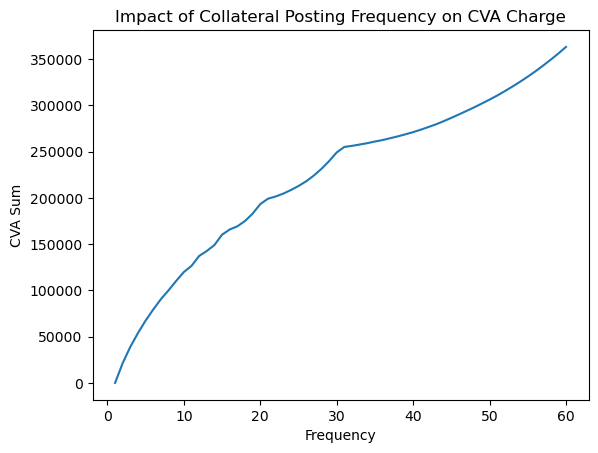

In [456]:
# Plot the results
plt.plot(fs, cva_col)
plt.xlabel('Frequency')
plt.ylabel('CVA Sum')
plt.title('Impact of Collateral Posting Frequency on CVA Charge')
plt.show()

## 4b

In [37]:
def exposure_remaining(exposure, col):
    return exposure - col

In [47]:
r = 0.03
LGD = 0.4
h = [0.02, 0.0215, 0.022]

In [48]:
init_margin = [1000000, 10000000, 100000000]
cva_init_margin = []
for m in init_margin:
    net = (positive_netting - m).clip(lower=0)
    cva = calculate_cva_charge(r, LGD, net, h)
    cva_init_margin.append(cva)  

In [49]:
cva_init_margin

[347485.04575875256, 189370.72569358782, 1016.3404263556149]

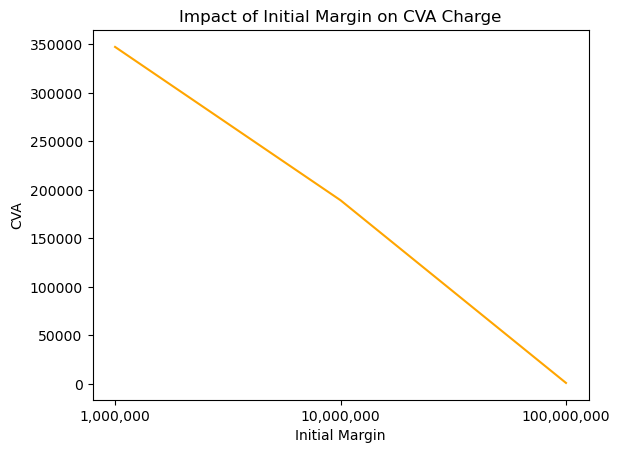

In [51]:
# Plot the results
index_m = ['1,000,000', '10,000,000', '100,000,000']
plt.plot(index_m, cva_init_margin, color='orange')
plt.xlabel('Initial Margin')
plt.ylabel('CVA')
plt.title('Impact of Initial Margin on CVA Charge')
plt.savefig('Q4b.png')
plt.show()

# Question 5

## 5a

In [36]:
LGD = 0.4

In [37]:
h = [0.02, 0.0215, 0.022]
cva, cva_df = calculate_cva_charge(r, LGD, positive_netting, h)
cva

370900.9368758239

In [38]:
h_1 = [0.021, 0.0215, 0.022]
cva_1, cva_1_df = calculate_cva_charge(r, LGD, positive_netting, h_1)
cva_1

373255.5452734825

In [39]:
h_2 = [0.02, 0.0225, 0.022]
cva_2, cva_2_df = calculate_cva_charge(r, LGD, positive_netting, h_2)
cva_2

377046.7202366823

In [43]:
h_3 = [0.02, 0.0215, 0.023]
cva_3, cva_3_df = calculate_cva_charge(r, LGD, positive_netting, h_3)

In [45]:
cva_new = [cva_1, cva_2, cva_3]

In [46]:
cva_change = []
for c in cva_new:
    change = (c - cva) / cva
    cva_change.append(change)

In [47]:
cva_change

[0.006348348476798096, 0.016569878233863758, 0.020816252500143198]

In [61]:
data = {
    'CVA Charge': ['Increase Forward Hazard Rate [0,1]', 'Increase Forward Hazard Rate [1,3]', 'Increase Forward Hazard Rate [3,5]'],
    'CVA Charge Price Change': cva_change
}

CVA_change_df = pd.DataFrame(data)
print(CVA_change_df)

                           CVA Charge  CVA Charge Price Change
0  Increase Forward Hazard Rate [0,1]                 0.006348
1  Increase Forward Hazard Rate [1,3]                 0.016570
2  Increase Forward Hazard Rate [3,5]                 0.020816


## 5b

In [49]:
d = {
    'Time': ['1Y', '3Y', '5Y'],
    'CDS Rate': [0, 0, 0],
    'Average h': [0, 0, 0],
    #'Survival Probability': [0, 0, 0],
    'Forward Hazard Rate': h
}
d_df = pd.DataFrame(d)
d_df

,Time,CDS Rate,Average h,Forward Hazard Rate
0,1Y,0,0,0.0200
1,3Y,0,0,0.0215
2,5Y,0,0,0.0220


In [50]:
# Calculate Survival Probability
#d_df.iloc[0, 3] = np.exp(-d_df.iloc[0, 4])
#d_df.iloc[1, 3] = np.exp(-d_df.iloc[0, 4]-2*d_df.iloc[1, 4])
#d_df.iloc[2, 3] = np.exp(-d_df.iloc[0, 4]-2*d_df.iloc[1, 4]-2*d_df.iloc[2, 4])
# Calculate Average h
d_df.iloc[0, 2] = (d_df.iloc[0, 3]) / 1
d_df.iloc[1, 2] = (d_df.iloc[0, 3]+2*d_df.iloc[1, 3]) / 3
d_df.iloc[2, 2] = (d_df.iloc[0, 3]+2*d_df.iloc[1, 3]+2*d_df.iloc[2, 3]) / 5
# Calculate CDS Rate
d_df.iloc[0, 1] = d_df.iloc[0, 2] * LGD
d_df.iloc[1, 1] = d_df.iloc[1, 2] * LGD
d_df.iloc[2, 1] = d_df.iloc[2, 2] * LGD

In [51]:
d_df # Original

,Time,CDS Rate,Average h,Forward Hazard Rate
0,1Y,0.00800,0.0200,0.0200
1,3Y,0.00840,0.0210,0.0215
2,5Y,0.00856,0.0214,0.0220


In [52]:
d1 = {
    'Time': ['1Y', '3Y', '5Y'],
    'CDS Rate': [0, 0, 0],
    'Average h': [0, 0, 0],
    'Forward Hazard Rate': h_1
}
d1_df = pd.DataFrame(d1)
# Calculate Average h
d1_df.iloc[0, 2] = (d1_df.iloc[0, 3]) / 1
d1_df.iloc[1, 2] = (d1_df.iloc[0, 3]+2*d1_df.iloc[1, 3]) / 3
d1_df.iloc[2, 2] = (d1_df.iloc[0, 3]+2*d1_df.iloc[1, 3]+2*d1_df.iloc[2, 3]) / 5
# Calculate CDS Rate
d1_df.iloc[0, 1] = d1_df.iloc[0, 2] * LGD
d1_df.iloc[1, 1] = d1_df.iloc[1, 2] * LGD
d1_df.iloc[2, 1] = d1_df.iloc[2, 2] * LGD

In [53]:
d1_df # Change [0,1]

,Time,CDS Rate,Average h,Forward Hazard Rate
0,1Y,0.008400,0.021000,0.0210
1,3Y,0.008533,0.021333,0.0215
2,5Y,0.008640,0.021600,0.0220


In [54]:
d2 = {
    'Time': ['1Y', '3Y', '5Y'],
    'CDS Rate': [0, 0, 0],
    'Average h': [0, 0, 0],
    'Forward Hazard Rate': h_2
}
d2_df = pd.DataFrame(d2)
# Calculate Average h
d2_df.iloc[0, 2] = (d2_df.iloc[0, 3]) / 1
d2_df.iloc[1, 2] = (d2_df.iloc[0, 3]+2*d2_df.iloc[1, 3]) / 3
d2_df.iloc[2, 2] = (d2_df.iloc[0, 3]+2*d2_df.iloc[1, 3]+2*d2_df.iloc[2, 3]) / 5
# Calculate CDS Rate
d2_df.iloc[0, 1] = d2_df.iloc[0, 2] * LGD
d2_df.iloc[1, 1] = d2_df.iloc[1, 2] * LGD
d2_df.iloc[2, 1] = d2_df.iloc[2, 2] * LGD

In [55]:
d2_df # Change [1,3]

,Time,CDS Rate,Average h,Forward Hazard Rate
0,1Y,0.008000,0.020000,0.0200
1,3Y,0.008667,0.021667,0.0225
2,5Y,0.008720,0.021800,0.0220


In [56]:
d3 = {
    'Time': ['1Y', '3Y', '5Y'],
    'CDS Rate': [0, 0, 0],
    'Average h': [0, 0, 0],
    'Forward Hazard Rate': h_3
}
d3_df = pd.DataFrame(d3)
# Calculate Average h
d3_df.iloc[0, 2] = (d3_df.iloc[0, 3]) / 1
d3_df.iloc[1, 2] = (d3_df.iloc[0, 3]+2*d3_df.iloc[1, 3]) / 3
d3_df.iloc[2, 2] = (d3_df.iloc[0, 3]+2*d3_df.iloc[1, 3]+2*d3_df.iloc[2, 3]) / 5
# Calculate CDS Rate
d3_df.iloc[0, 1] = d3_df.iloc[0, 2] * LGD
d3_df.iloc[1, 1] = d3_df.iloc[1, 2] * LGD
d3_df.iloc[2, 1] = d3_df.iloc[2, 2] * LGD

In [57]:
d3_df # Change [3,5]

,Time,CDS Rate,Average h,Forward Hazard Rate
0,1Y,0.00800,0.0200,0.0200
1,3Y,0.00840,0.0210,0.0215
2,5Y,0.00872,0.0218,0.0230


In [58]:
def cal_change(old, new):
    change = []
    for i in range(0,3):
        c = (new.iloc[i,2] - old.iloc[i,2]) / old.iloc[i,2]
        change.append(c)
    return change

In [59]:
c1 = cal_change(d_df, d1_df)
c2 = cal_change(d_df, d2_df)
c3 = cal_change(d_df, d3_df)

In [62]:
data = {
    'CDS Price Changes': ['Increase Forward Hazard Rate [0,1]', 'Increase Forward Hazard Rate [1,3]', 'Increase Forward Hazard Rate [3,5]'],
    '1Y CDS': [0, 0, 0],
    '3Y CDS': [0, 0, 0],
    '5Y CDS': [0, 0, 0]
}

CDS_change_df = pd.DataFrame(data)
CDS_change_df.iloc[0, 1:4] = c1
CDS_change_df.iloc[1, 1:4] = c2
CDS_change_df.iloc[2, 1:4] = c3
print(CDS_change_df)

                    CDS Price Changes  1Y CDS    3Y CDS    5Y CDS
0  Increase Forward Hazard Rate [0,1]    0.05  0.015873  0.009346
1  Increase Forward Hazard Rate [1,3]    0.00  0.031746  0.018692
2  Increase Forward Hazard Rate [3,5]    0.00  0.000000  0.018692


# 5d

## CDS 5Y Notional

To compute notional for CDS 5Y when h [3,5] went up:

- Calculate $\delta_{5Y} = \frac{\delta_{\text{CDS_5Y}}}{\delta_{CVA}}$, which represents the sensitivity of the CDS to changes in CVA.

- Divide the increased CVA amount by $\delta_{5Y}$.

In [68]:
delta_5Y = CDS_change_df.iloc[2,3] / CVA_change_df.iloc[2,1]
N_5Y = (cva_3 - cva) / delta_5Y
N_5Y

8598.383409704225

## CDS 3Y Notional

To compute notionals for CDS 3Y when h [1,3] went up:

- Calculate increased CVA amount hedged by 5Y CDS contract with the above 5Y notionals and $\delta_{\text{CDS_5Y}}$.
- Calculate remaining CVA amount to be hedged by 3Y CDS contract.
- Calculate 3Y notionals